# ML in Medicine
## Rethinking 'virtues' in Medicine

This notebook is an extended metaphor about two types of learning: memorizing and pattern identification.
It's designed specifically to illustrate the importance of switching medicine's culture away from memorizing and more towards identifying and influencing patterns.

## Imports

In [20]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import scipy.stats as stats
import pandas as pds

from IPython.display import HTML, display
import tabulate

...and a little bit of setup that we'll explain later.

In [22]:
x = np.linspace(-10,10,100)
y = lambda x:x*(x-4)*(x+4)
yc = y(x)

## A day at work...
Imagine someone handed you twenty sheets of data and told you it was important to know it:


In [21]:
def generator(nsamp,noise):
    xr = np.random.uniform(-10,10,size=(nsamp,))
    yr = y(xr) + np.random.normal(0,noise,size=(nsamp,))

    return xr,yr

In [23]:
dataset = generator(100,0)
df_main = pds.DataFrame(dataset)
display(HTML(df_main.transpose().to_html()))

,0,1
0,-9.195311,-630.372982
1,7.764702,343.903317
2,3.588733,-11.200413
3,3.937580,-1.950940
4,8.320911,442.984990
5,-2.101383,24.342820
6,5.395575,70.747994
7,-6.147923,-134.005983
8,9.433289,688.506915
9,1.620752,-21.674579


So, you've just been told to memorize all of the above values.

What do you do?

## The Good Medical Student
You don't ask questions, you're a machine when it comes to memorizing.
You memorized that biochemistry textbook inside and outside in college; it's what got you the almost perfect MCAT and brought you here.

You've got 200 numbers to memorize.
Each of those numbers has between 7-9 digits to memorize.
That's a total of about 1600 digits, and the order that they're in, you have to get to.
You start ASAP because, while you may be a machine, you still need sleep.

## The Good Engineer
You're lazy. You're going to try to memorize as little as possible because it not only takes so long to memorize, it takes a lot of effort to *keep* it memorized.

So, you do what you're trained to do: find the pattern.
First thing you do is that all the numbers that you were given and you plot them.
You take the first column and plot that along the x-axis.
The second column you put along the y-axis.

(-50, 50)

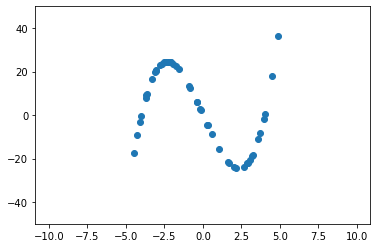

In [27]:
plt.figure()
plt.scatter(dataset[0],dataset[1])
plt.ylim((-50,50))

Sure looks like a pattern... In fact, one of the first patterns you ever learned.
It looks a bit like you take whatever value you're given and send it through this equation:

$$
y = x \cdot (x - 4) \cdot (x + 4) = x^3 - 16x
$$

This is pretty great since you now only really need to memorize four things...
Three numbers (1, -16, and 0) and the fact that we're dealing with *cubic* functions.
Of course, you need to refresh yourself on what a *cubic* function is, but you learned that a long time ago.
Taken together, you just memorized a *rule* that tells you how you can get from a number x (first column) to another number y (second column).

Now, armed with those three things, you only need to memorize the first column of numbers.
The second column of numbers you can just calculate with the rules you memorized.

## The Next Day...
You walk into the clinic the next day, a new confidence oozing off your noggin.
You feel ready for the questions your preceptor undoubtedly has ready to fire off.

"Oh, sorry, there was a mistake with the dataset and it cut off two columns! Here they are, should be no problem to memorize."

Uh oh.

In [26]:
def show_plot(noise,nsamp=100):
    xr,yr = generator(nsamp,noise)
    
    fig1 = plt.figure()
    #plt.plot(x,yc)
    plt.scatter(xr,yr)
    plt.ylim((-50,50))
    plt.show()
    
    return xr,yr
    
w = interactive(show_plot, nsamp=(100,1000,100),noise=(0.,100.))
display(w)

interactive(children=(FloatSlider(value=50.0, description='noise'), IntSlider(value=100, description='nsamp', …

"Here's a fact: x,y,z".

## Parting words

What is a pattern? A pattern is just *a rule*. Finding patterns in data is what all scientists do, they just do it by first analysing all the pieces in isolation.

What clinicians and engineers do is learn the patterns as a whole. What the engineer does is use math to learn the patterns, make sure the patterns actually exist, make sure the patterns apply to new sets of data.

The clinician has a decision branch: be more like the scientist and learn the data directly or be more like the engineer and learn the math *underlying* the data.

The commonly framed caution: just because you find a pattern doesn't mean its really there. In other words, just because you can describe patterns in a dataset does not mean that those patterns hold in general, with a larger sample size.